# Well, Well Wellness :
A comparative analysis of top 5 wellness apps - customer clustering and sentiment analysis using NLP to develop language descriptors for best and worst app reviews to inform what is going well and what could be improved in the world of wellness apps.

# Obtain:

Inspired by: https://www.curiousily.com/posts/create-dataset-for-sentiment-analysis-by-scraping-google-play-app-reviews-using-python/ SEVERAL copies of this same project exist in various formats by various authors.

going to App Annie and looking at top grossing wellness apps:
https://www.appannie.com/apps/google-play/top-chart/?country=US&category=19&device=&date=2020-04-05&feed=All&rank_sorting_type=rank&page_number=0&page_size=100&table_selections=

In [34]:
#!pip install google_play_scraper

In [2]:
import json
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter
from google_play_scraper import Sort, reviews, app
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

## ...Top 5 Wellness Apps:

According to appannie, the top five grossing wellness apps on July 1:

1. Calm
* MyFitnessPal
* Headspace
* Me
* Fitbit

Rankings change daily.

Data on each package was obtained using google play scraper and overviews of each app can be observed below:

In [3]:
#creating a list of top apps based on their google play app id

app_packages = [
    'com.calm.android',
    'com.myfitnesspal.android',
    'com.getsomeheadspace.android', 
    'com.gen.workoutme',
    'com.fitbit.FitbitMobile'
]

In [5]:
#obtaining information on each app and descriptive history using google_play_scraper api
app_infos = []

for ap in tqdm(app_packages):
    info = app(ap, lang='en', country='us')
    del info['comments']
    app_infos.append(info)

100%|██████████| 5/5 [00:02<00:00,  2.40it/s]


In [6]:
app_infos_df = pd.DataFrame.from_records(app_infos)

#  App Descriptions and Summaries below:

In [7]:
app_infos_df

,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,...,contentRatingDescription,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,appId,url
0,"Calm - Meditate, Sleep, Relax",Calm is a leading app for meditation and sleep...,Calm is a leading app for meditation and sleep...,Join the millions discovering the life-changin...,Join the millions discovering the life-changin...,"10,000,000+",10000000,4.391991,264265,90061,...,None,None,None,"Jul 30, 2014",1592802654,Varies with device,"As always, you can expect an original Daily Ca...","As always, you can expect an original Daily Ca...",com.calm.android,https://play.google.com/store/apps/details?id=...
1,Calorie Counter - MyFitnessPal,"Whether you want to lose weight, tone up, get ...","Whether you want to lose weight, tone up, get ...","Lose weight with MyFitnessPal, the easiest cal...","Lose weight with MyFitnessPal, the easiest cal...","50,000,000+",50000000,4.449800,2298718,804780,...,None,True,True,"Apr 26, 2010",1593538571,Varies with device,Whether you want to log your lowest weight in ...,Whether you want to log your lowest weight in ...,com.myfitnesspal.android,https://play.google.com/store/apps/details?id=...
2,Headspace: Meditation & Sleep,Learn the life-changing skills of meditation i...,Learn the life-changing skills of meditation i...,Meditation and mindfulness in just a few minut...,Meditation and mindfulness in just a few minut...,"10,000,000+",10000000,3.437186,133000,53987,...,None,None,None,"Jan 6, 2012",1593711785,3.57.0,A steady meditation practice can calm the mind...,A steady meditation practice can calm the mind...,com.getsomeheadspace.android,https://play.google.com/store/apps/details?id=...
3,BetterMe: Home Workouts & Diet,BetterMe: Home Workouts & Diet To Lose Weight ...,BetterMe: Home Workouts &amp; Diet To Lose Wei...,"Weight Loss Workout: Abs, Butt, Legs and Whole...","Weight Loss Workout: Abs, Butt, Legs and Whole...","10,000,000+",10000000,4.164125,72755,28091,...,None,None,None,"Jul 27, 2017",1593177656,3.8.2,Bug fixes and performance improvements.,Bug fixes and performance improvements.,com.gen.workoutme,https://play.google.com/store/apps/details?id=...
4,Fitbit,Start a free 90-day trial of Fitbit Premium fo...,Start a free 90-day trial of Fitbit Premium fo...,Fitbit is dedicated to helping people lead hea...,Fitbit is dedicated to helping people lead hea...,"50,000,000+",50000000,3.723831,663620,303683,...,None,None,None,"Mar 16, 2012",1593200570,Varies with device,*Bug fixes and performance improvements,*Bug fixes and performance improvements,com.fitbit.FitbitMobile,https://play.google.com/store/apps/details?id=...


A helper function from the inspiration project to read .json files: 

In [8]:
def print_json(json_object):
    json_str = json.dumps(
        json_object,
        indent=2,
        sort_keys=True,
        default=str)
    print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [18]:
print_json(app_infos[4])

{
  "adSupported": null,
  "androidVersion": "Varies",
  "androidVersionText": "Varies with device",
  "appId": "com.fitbit.FitbitMobile",
  "containsAds": null,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "Start a free 90-day trial of Fitbit Premium for personalized guidance, customized health programs and 240+ video workouts you can do at home. \r\n\r\nSay hello to one of the world\u2019s leading apps for health and fitness. Use the Fitbit app on it\u2019s own to join our community, track basic stats and stay motivated on your journey. Or, get a Fitbit tracker or smartwatch to see how your activity, workouts, sleep, nutrition and stress all fit together. Either way, you\u2019ll find the information and inspiration you need to reach your goals\u2014all in one place. \r\n\r\nA free app that tracks your day & progress over time\r\nFind free workouts, nutrition programs, meditation tracks, sleep tools & more \r\nConnect with fr

  "descriptionHTML": "Start a free 90-day trial of Fitbit Premium for personalized guidance, customized health programs and 240+ video workouts you can do at home. <br><br>Say hello to one of the world\u2019s leading apps for health and fitness. Use the Fitbit app on it\u2019s own to join our community, track basic stats and stay motivated on your journey. Or, get a Fitbit tracker or smartwatch to see how your activity, workouts, sleep, nutrition and stress all fit together. Either way, you\u2019ll find the information and inspiration you need to reach your goals\u2014all in one place. <br><br>A free app that tracks your day &amp; progress over time<br>Find free workouts, nutrition programs, meditation tracks, sleep tools &amp; more <br>Connect with friends, start challenges &amp; join an inspiring community<br>Set goals, earn achievement badges &amp; celebrate milestones<br>Automatically sync your data to 3,000+ popular partner apps<br>Access innovative smartwatch apps &amp; fresh clo

In [10]:
app_packages[0]

'com.calm.android'

### logos:

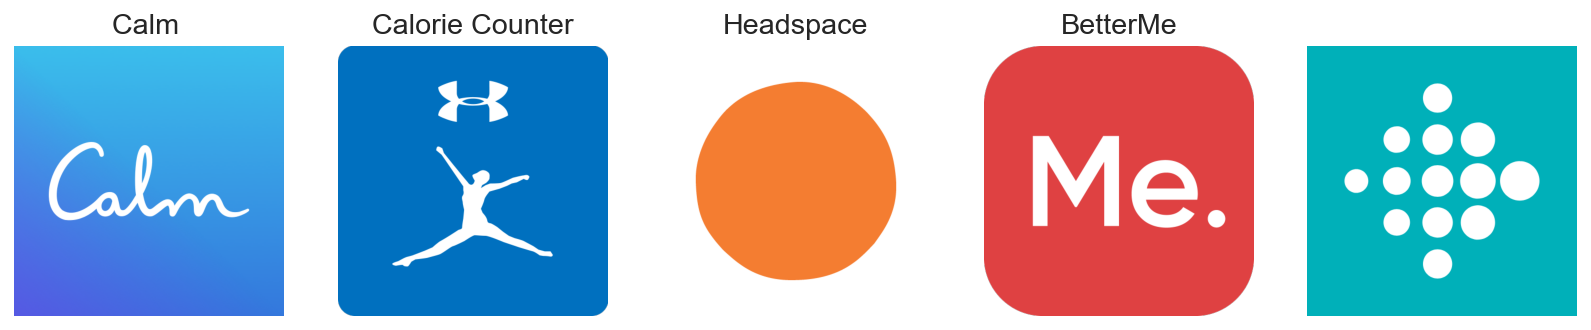

In [21]:
def format_title(title):
    sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
    if sep_index != -1:
        title = title[:sep_index]
        return title[:15]
fig, axs = plt.subplots(1,5,figsize=(14, 5))

for i, ax in enumerate(axs.flat):
    ai = app_infos[i]
    img = plt.imread(ai['icon'])
    ax.imshow(img)
    ax.set_title(format_title(ai['title']))
    ax.axis('off')

### Obtaining app reviews:

In [12]:
help(reviews)

Help on function reviews in module google_play_scraper.features.reviews:

reviews(app_id, lang=None, country=None, sort=None, count=None, filter_score_with=None, continuation_token=None)



In [22]:
#looking at reviews function and learning...
calm, continuation_token = reviews('com.calm.android', lang='en', country='us',sort=Sort.MOST_RELEVANT, count=3)
calm

[{'reviewId': 'gp:AOqpTOHJ6MwKNvmoxIaWnWIecIl8g5AEfy0mwDBwwx2ZnN8cPxd6p8PUE-xbcFwBDi8Tl2bFWmvkQIC5RY7zqA',
  'userName': 'Jesús Domínguez',
  'userImage': 'https://lh3.googleusercontent.com/a-/AOh14GjPg5UpGX-k7dr6gGtWEqFiFpLMpJkknO7Z9l0MFg',
  'content': "COULD BE PERFEC. I think this app could be perfect. The content is amazing; however, there are a couple of technical fails that keeps this app away from being perfect. First, there is no cast option. At this time you can't justify not having the cast feature on an app that plays music. Second, you should allow users to have at least two profiles per account. I know you need the subscription to keep the service running, but this is not a cheap subscription (It's not expensive either) so you could allow users to create at least two different profiles. Why do I think two profiles are needed? Just imagine using the app to play some calming music to your kids before sleep. Then, that time will be counted as your own mindful minutes or one 

saving for api usage: 
https://github.com/JoMingyu/google-play-scraper
better than this one: 
https://github.com/facundoolano/google-play-scraper#reviews

In [23]:
results = []
for ap in tqdm(app_packages):
    result, continuation_token = reviews(
    ap,
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT SQL-like calls
    count = 10000, # defaults to 100, returns number of records you want
    filter_score_with=None) # defaults to None(means all score) might be usefull to scrape some more low scores if needed
    
    for a in result:
        a['application'] = ap #tracking which app we grabbed review of
        
    results.extend(result)

100%|██████████| 5/5 [02:34<00:00, 30.91s/it]


In [24]:
len(results)

50000

In [25]:
app_reviews_df = pd.DataFrame(results)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)

In [26]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,application
0,gp:AOqpTOHJ6MwKNvmoxIaWnWIecIl8g5AEfy0mwDBwwx2...,Jesús Domínguez,https://lh3.googleusercontent.com/a-/AOh14GjPg...,COULD BE PERFEC. I think this app could be per...,3,5,4.28,2020-07-01 09:14:26,None,NaT,com.calm.android
1,gp:AOqpTOHqY7LdB_LM2G-_3P2v2up5xb6p_s1r3n1a4LW...,Phl Smyth,https://lh3.googleusercontent.com/-YOCPoUMvv0Y...,I really like the majority of this app. The mu...,4,24,4.28,2020-06-30 17:46:59,None,NaT,com.calm.android
2,gp:AOqpTOFWOgeniWo1gj1s13nuJMb16vNhWl5sw_XdjeI...,Jessika Solleder,https://lh3.googleusercontent.com/a-/AOh14Gi3Z...,AN ABSOLUTE GAME CHANGER! I can't say enough a...,5,129,4.28,2020-06-29 00:24:54,None,NaT,com.calm.android
3,gp:AOqpTOFI2JmWLB8KyYpntAp36E32XFRcRE5V9IohX8i...,Rose Jesky,https://lh3.googleusercontent.com/a-/AOh14GiMl...,"wonderful. I tried Headspace, which was ok but...",5,235,4.28,2020-06-26 12:26:35,None,NaT,com.calm.android
4,gp:AOqpTOFMK6HLocZnUOfalyXTps9C7eSciegQiVnUYC2...,Melissa Fisk,https://lh3.googleusercontent.com/a-/AOh14Gj_O...,I love this app!! it calms me down every night...,5,15,4.28,2020-06-29 11:36:50,None,NaT,com.calm.android


## EDA: Begin exploring data 

#### observation: good to see not as imbalanced as in cases past.  :-P

In [28]:
app_reviews_df['score'].value_counts()

5    20752
1    13760
4     6615
3     4475
2     4398
Name: score, dtype: int64

In [30]:
#looking for various app versions to perhaps evauluate ratings based on version improvements? 
#245 versions between the 5 apps
app_reviews_df['reviewCreatedVersion'].value_counts()

3.21       1920
20.7.0     1876
20.10.0    1344
3.23       1231
3.57.0     1225
           ... 
2.0.8         1
2.7.5         1
2.4.2         1
2.2.1         1
3.7           1
Name: reviewCreatedVersion, Length: 245, dtype: int64

## ...missing data and associated patterns:

In [31]:
import missingno as msno

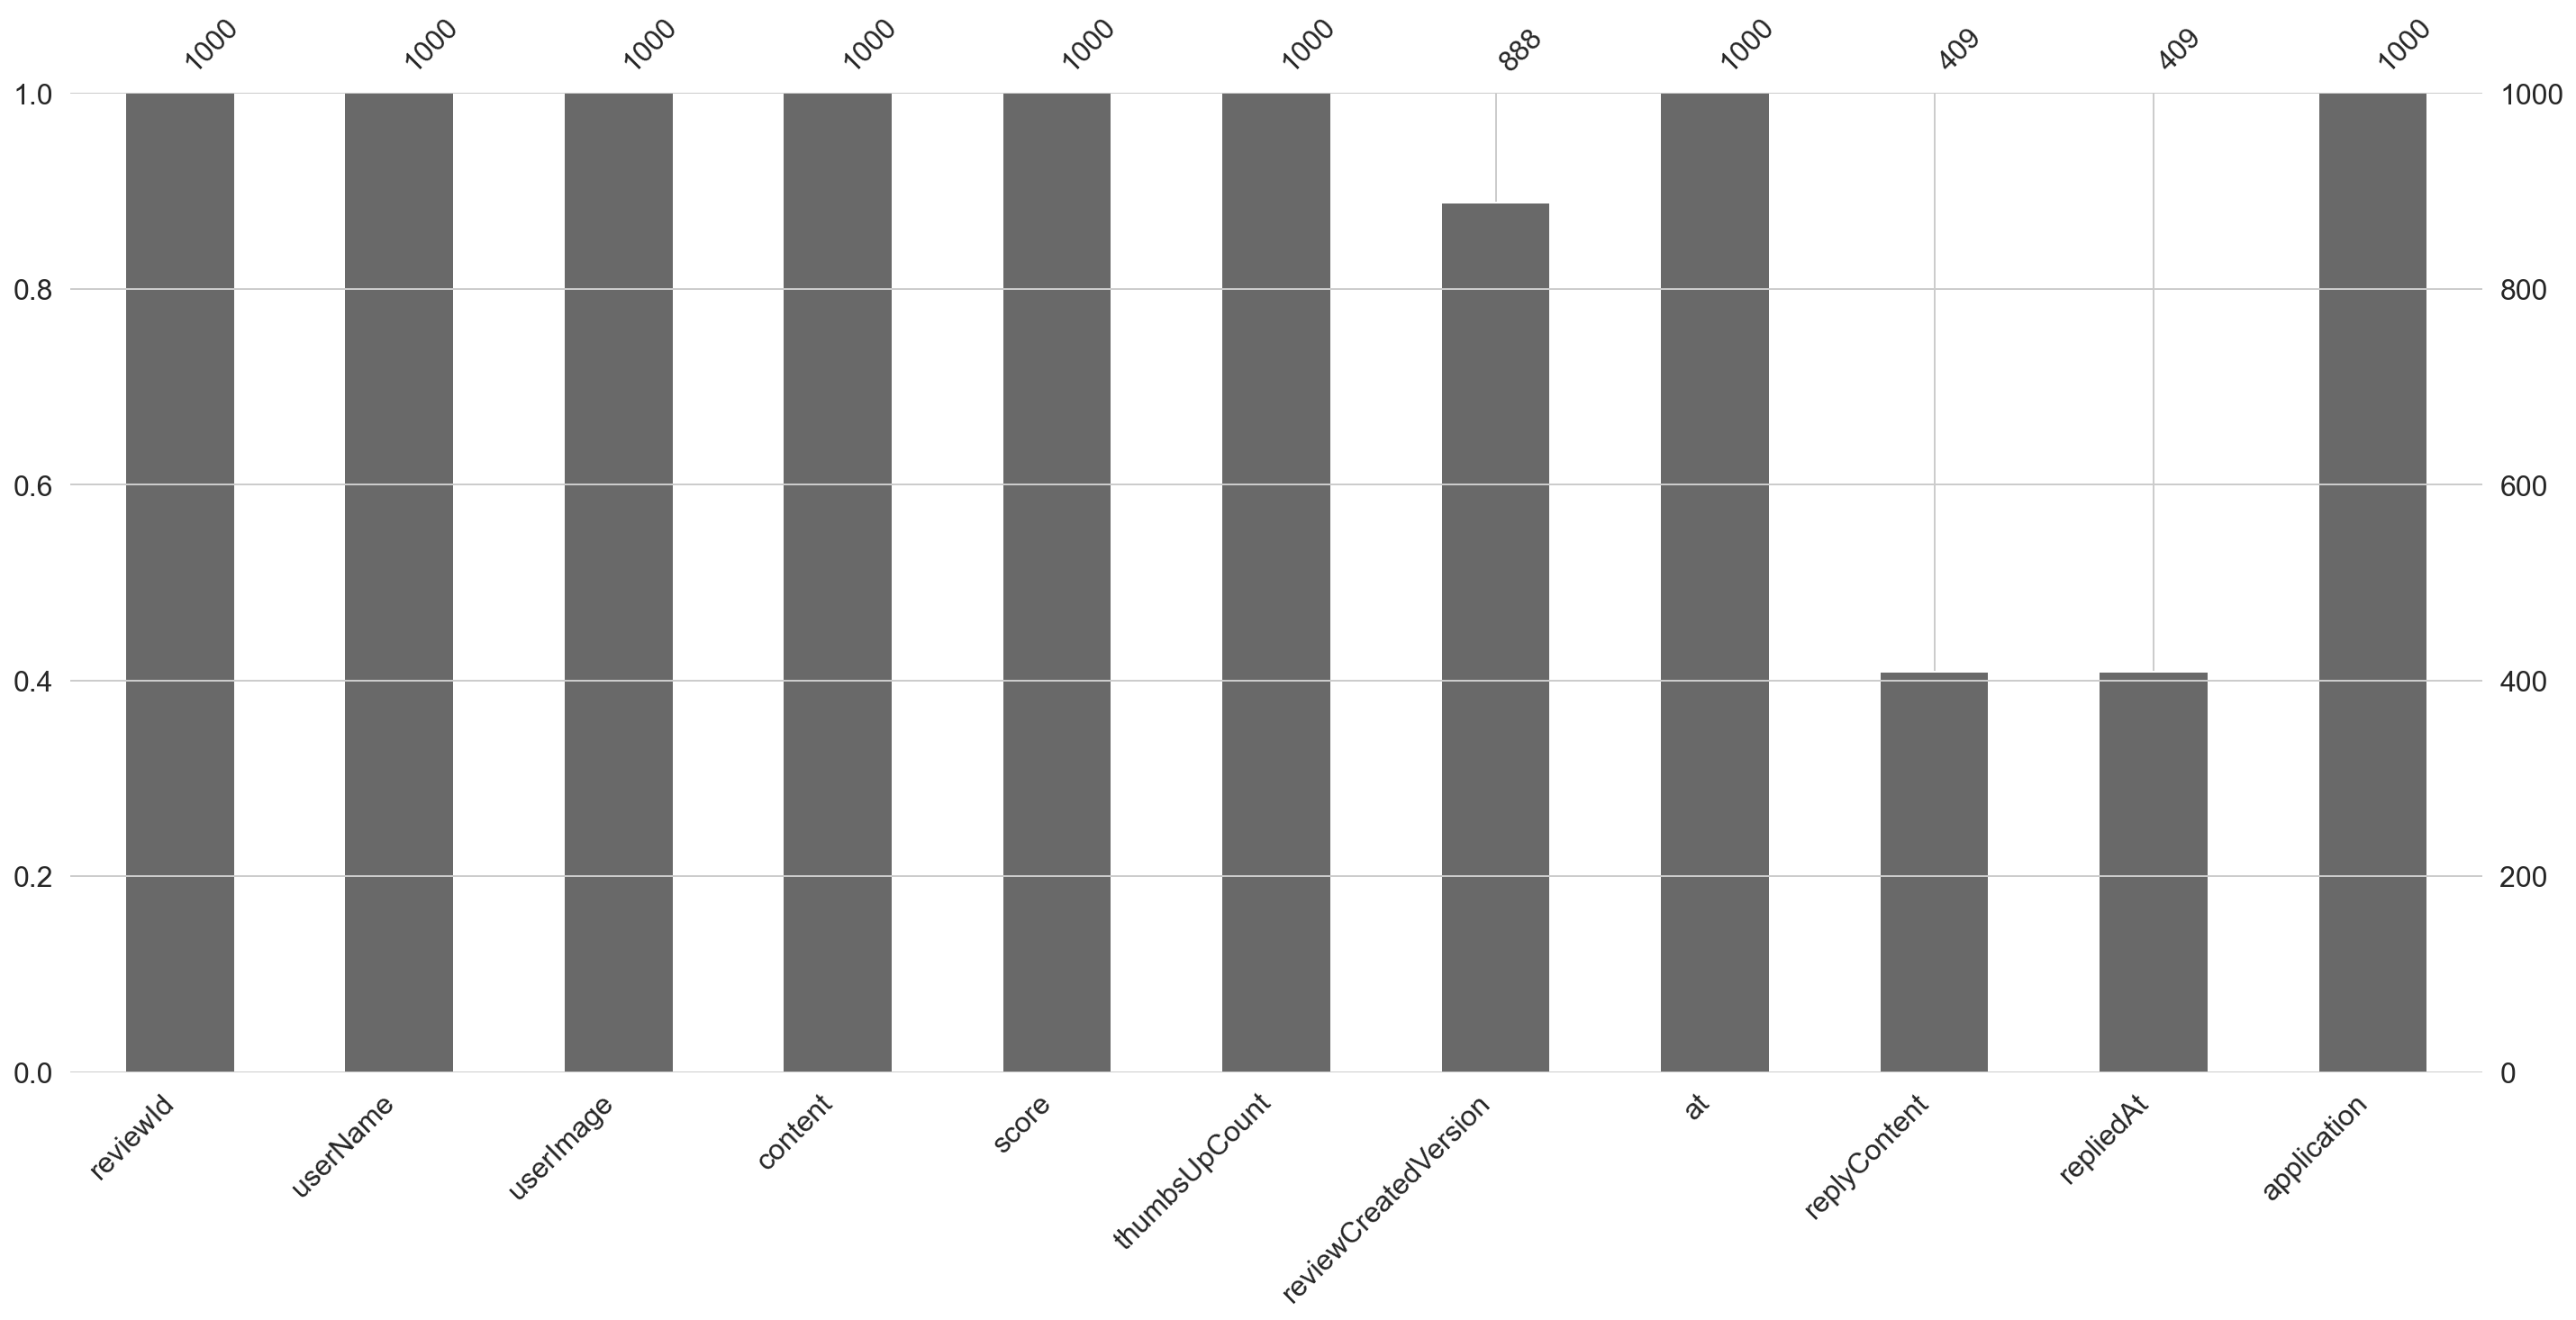

In [32]:
msno.bar(app_reviews_df.sample(1000))

In [33]:
#repliedAt and replyConentent are directly related and could give time series insight?

In [34]:
df = app_reviews_df.copy()

In [35]:
df1 = df[df['replyContent'].notnull()]

In [ ]:
df1['score'].value_counts()

clearly those replyContent are in response to 1 star reviews...  intriguing..

In [ ]:
from wordcloud import WordCloud

In [ ]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

wordcloud.generate(df['content'].to_string())

wordcloud.to_image()